**TP 2 - MDI221** 

**Analyse des données du TITANIC**



---







In [ ]:
import numpy as np
import pandas as pd

In [ ]:

!wget https://perso.telecom-paris.fr/ciblat/tp2_mdi221_titanic.csv


--2022-11-14 15:43:40--  https://perso.telecom-paris.fr/ciblat/tp2_mdi221_titanic.csv
Resolving perso.telecom-paris.fr (perso.telecom-paris.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paris.fr (perso.telecom-paris.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://perso.telecom-paristech.fr/ciblat/tp2_mdi221_titanic.csv [following]
--2022-11-14 15:43:41--  https://perso.telecom-paristech.fr/ciblat/tp2_mdi221_titanic.csv
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘tp2_mdi221_titanic.csv’

tp2_mdi221_titanic. 100%[===================>]  59.76K  --.-KB/s    in 0.1s    

2022-11-14 15:43:42 (420 KB/s) - ‘tp2_mdi221_titanic.csv’ saved [61

# Les données

<font color="blue">Question 1 : Charger le fichier csv 'tp2_midi221_titanic.csv' sous forme de dataframe.
</font>

In [ ]:
df = pd.read_csv("/content/tp2_mdi221_titanic.csv")

<font color='blue'>Question 2 : Inspecter les données, afficher les premières lignes.
</font>

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color="blue">Question 3 : Utiliser la méthode "describe" et répondre aux questions suivantes :  

*   Moyenne d'âge des passagers ? 
*   Age du passager le plus agé ? 
*   Pourcentage de passagers ayant survécu ? 
</font>

In [ ]:
df.describe()
##moyenne d'âge 29.67, max d'âge 80, pourcentage de passagers survécu 38.28%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color="blue">Question 4 : calculer 
*   le nombre d'hommes
*   le nombre de survivants chez les hommes
</font>

In [ ]:
(df['Sex']=='male').sum(), df[df['Sex']=='male']['Survived'].sum()

(577, 109)

<font color="blue">Question 5 : tracer l'histogramme des âges et/ou des classes</font>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

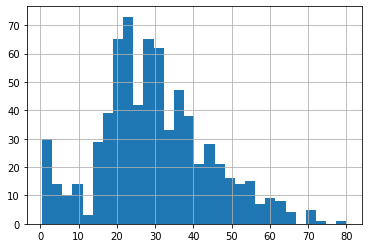

In [ ]:
df['Age'].hist(bins=30);

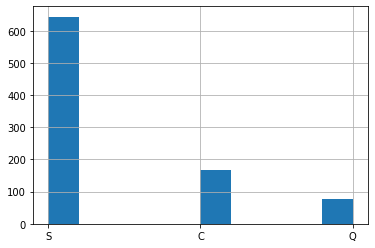

In [ ]:
df['Embarked'].hist()

## Traitement des données manquantes

<font color="blue">Question 6 : évaluer le nombre de données manquantes par colonne</font>

In [ ]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<font color="blue">Question 7 : supprimer les colonnes 'Cabin', 'PassengerId', 'Name', 'Ticket'.
</font>

In [ ]:
df.drop(columns=['Cabin','PassengerId','Name','Ticket'], inplace=True)

<font color="blue">Question 8 : créer une nouvelle dataframe où les NaN sont remplacées par la médiane de la colonne.
</font>

In [ ]:
df.fillna(df.median()).tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,28.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


En fait les données manquantes étant l'âge, il parait plus pertinent de remplacer les valeurs manquantes par l'âge moyen de la classe correspondante.  
<font color="blue">Question 9 : évaluer la moyenne d'âge au sein de chaque classe.
</font>

In [ ]:
moy_age = df.groupby('Pclass').mean()['Age']
moy_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<font color="blue">Question 10 : créer une fonction "impute_age" qui à toute liste (age,classe) retourne  
*   l'âge moyen de la classe lorsque age=NaN
*   l'âge sinon 
</font>

In [ ]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isna(age):
        return moy_age[pclass]
    else:
        return age

<font color="blue">Question 11 : avec la méthode apply(), appliquer cette fonction à chaque ligne de la dataframe df[['Age','Pclass']]  
Substituer la colonne obtenue à la colonne 'Age'</font>

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

<font color="blue ">Question 12 : vérifier qu'il n'y a plus de données manquantes, ou s'il en reste quelques unes, supprimer les lignes correspondantes.</font>

In [ ]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

## Conversion des variables catégorielles (variables non chiffrées)
'sex' et 'embark' sont les seules variables catégorielles.  
<font color="blue">
Question 13 : avec pd.get_dummies(), créer des dummy variables</font>

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
df.drop(columns=['Sex','Embarked'],inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Régression logistique

In [ ]:
# Réponse (y) et matrice contenant les "features" (ligne : une personne ; colonnes : les features de la personne)
y = df.Survived.values
X = df.drop(columns='Survived').values
feature_names = df.drop(columns='Survived').columns
print(y[:5])
print(X[:5,:])

[0 1 1 1 0]
[[ 3.     22.      1.      0.      7.25    1.      0.      1.    ]
 [ 1.     38.      1.      0.     71.2833  0.      0.      0.    ]
 [ 3.     26.      0.      0.      7.925   0.      0.      1.    ]
 [ 1.     35.      1.      0.     53.1     0.      0.      1.    ]
 [ 3.     35.      0.      0.      8.05    1.      0.      1.    ]]


### Algorithme du gradient

<font color="blue">Question 14 : remplir les lignes permettant de calculer le gradient de la fonction de coût.
</font>

In [80]:
def logistic_regression_grad(features, target, num_steps):
    
    ############ WHAT IS THIS LINE FOR ? ##############
    features = np.hstack( (np.ones((features.shape[0],1)), features))
    ###################################################
    
    weights = np.zeros(features.shape[1])
    learning_rate = 4/np.linalg.eigvals(features.T.dot(features)).max()
    
    for step in range(num_steps):
        
        ################## FILL THIS PART ##############
        scores = np.dot(features, weights)
        predictions = 1/(1+np.exp(-np.dot(features,weights)))
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += gradient*learning_rate
        ################################################
        
        # Print log-likelihood every so often
        if step % 50000 == 0:
            print(np.sum( target*scores - np.log(1 + np.exp(scores))))
        
    return weights

<font color="blue">Question 15 : faire tourner la méthode sur les données d'apprentissage. Combien d'itérations sont nécessaires pour que l'algorithme converge ? Evaluer le temps d'exécution avec %time</font>

In [83]:
%time weights = logistic_regression_grad(X,y,num_steps=1000000)

-616.2078435177914
-427.5760951843458
-414.7456845523612
-407.2001106728086
-402.12401707000174
-398.6590451453357
-396.2734977354507
-394.61760789802076
-393.4593096747287
-392.64337624003815
-392.0650136325092
-391.6527975794336
-391.35759618209914
-391.14532045673434
-390.99213320772196
-390.88124927562524
-390.8007761928499
-390.74224237427234
-390.6995846009528
-390.66844555714124
CPU times: user 37.8 s, sys: 3.77 ms, total: 37.8 s
Wall time: 37.9 s


<font color="blue">Question 16 : utiliser scikit-learn et vérifier que les résultats coïncident.
</font>

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
classifier = LogisticRegression(C=1e20)
classifier.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1e+20)

In [86]:
classifier.coef_[0], weights[1:]

(array([-1.21452110e+00, -4.33740106e-02, -3.32063978e-01, -6.48988693e-02,
         1.52002494e-03, -2.65560781e+00,  1.02434185e-01, -3.54543451e-01]),
 array([-1.14062705e+00, -4.15562309e-02, -3.35430684e-01, -8.84347323e-02,
         2.09662389e-03, -2.69531083e+00, -7.03816018e-02, -3.65786098e-01]))

### Algorithme de Newton

In [87]:
def logistic_regression_newton(features, target, num_steps):

    features = np.hstack( (np.ones((features.shape[0],1)), features))
    
    weights = np.zeros(features.shape[1])
        
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = 1/(1+np.exp(-scores))

        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        hessian = -np.dot(features.T.dot(np.diag(predictions * (1-predictions))),features)
        
        ############# NOTE THE DIFFERENCE HERE #############
        weights -= np.linalg.pinv(hessian).dot(gradient)
        ####################################################
        
        print(np.sum( target*scores - np.log(1 + np.exp(scores))))
        
    return weights

<font color="blue">Question 17 : faire tourner la méthode sur les données d'apprentissage. Combien d'itérations sont nécessaires pour que l'algorithme converge ? Evaluer le temps d'exécution avec %time</font>

In [88]:
%time weights = logistic_regression_newton(X, y, num_steps = 5)

-616.2078435177914
-405.5434772336988
-391.2450069004829
-390.5854216248877
-390.58306389516304
CPU times: user 45.1 ms, sys: 23 ms, total: 68.2 ms
Wall time: 41 ms


Inconvénients :
1. Inversion du hessien à chaque itération : ne peut être utilisée lorsqu'il y a beaucoup de features.
2. Garantie de convergence seulement si l'initialisation n'est "pas trop loin" de la solution

Il existe des solutions pour éviter ces inconvénients. Les méthodes de "quasi-newton" diminuent la complexité liée à l'inversion du hessien, et les techniques dites de "recherche linéaire" permettent de garantir la convergence au prix de quelques calculs supplémentaires.

## Evaluation des performances.

<font color="blue">Question 18 : en utilisant la fonction ci-dessous (ou son équivalent scikit-learn), séparer la dataframe en une data-frame de données et un data-frame de test. Vous pourrez jouer à votre guise avec la proportion affectée au training et en analyser les conséquences sur les performances.
</font>

In [121]:
import random as rd

def train_test_splt(df,ratioTraining):
    train_idx = np.sort(rd.sample(range(len(df)),int(np.floor(ratioTraining*len(df)))))
    test_idx = np.setxor1d(range(len(df)),train_idx)
    return df.iloc[train_idx], df.iloc[test_idx]

In [130]:
train, test = train_test_splt(df,0.9)

<font color="blue">Question 19 : apprendre le modèle sur la base des données de  training (sélectionnées ci-dessus) en utilisant l'un des algorithmes vus plus haut.
</font>

In [131]:
Xtrain = train.drop(columns=['Survived']).values
ytrain = train['Survived'].values
weights = logistic_regression_newton(Xtrain, ytrain, num_steps=5)

-554.5177444479561
-362.1697127654825
-348.73551939642255
-348.0749742109216
-348.0722352560191


<font color="blue">Question 20 : compléter la fonction suivante qui renvoie les décisions douces.</font>

In [132]:
def soft_decision(features, weights):
    
    features = np.hstack((np.ones((features.shape[0],1)),features))
    scores = np.dot(features,weights)
    
    return 1 / (1 + np.exp(-1*scores))

In [135]:
Xtest = test.drop(columns=['Survived']).values
ytest = test['Survived'].values
soft = soft_decision(Xtest,weights)
print(soft[:5])
print(ytest[:5])

[0.02713435 0.5060368  0.71301826 0.55218895 0.40130806]
[0 0 1 0 0]


<font color="blue">Question 21 : calculer les décisions dures et estimer la probabilité d'erreur.</font>

In [136]:
hard = soft>0.5
err_proba = (ytest!=hard).sum()/len(ytest)
err_proba

0.23595505617977527

La matrice de confusion est
$$
\begin{pmatrix}
t_p & f_p \\ f_n & t_n
\end{pmatrix}
$$
où
- $t_p$ (bonne détection) = nombre de vrais positifs (la vraie valeur est 1, la décision est 1)
- $f_p$ (fausse alarme) = nombre de faux positifs (la vraie valeur est 0, la décision est 1 : erreur de type I ou "fausse alarme")
- $f_n$ = nombre de faux négatifs (la vraie valeur est 1, la décision est 0 : erreur de type II ou "manque")
- $t_n$ = nombre de vrais négatifs (la vraie valeur est 0, la décision est 0)  

In [137]:
p = (ytest==1)
n = (ytest==0)
t = (ytest==hard)
f = (ytest!=hard)
tp = (t & p).sum()
tn = (t & n).sum()
fp = (f & p).sum()
fn = (f & n).sum()
confusion_matrix = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix)

[[24 10]
 [11 44]]


<font color="blue">Question 22 : 
- estimer la probabilité de fausse alarme  (c'est à dire la probabilité de 
décider '1' lorsque le label est '0')  
- estimer la puissance (c'est à dire la probabilité de décider '1' lorsque le label est '1')
</font>

In [138]:
pfa = fp/(fp+tn)
power = tp/(fn+tp)
pfa,power

(0.18518518518518517, 0.6857142857142857)

# Courbe ROC
Si on diminue le seuil, on augmente le nombre de fausses alarmes et on augmente également la puissance.  
La courbe ROC est l'ensemble des couples (pfa,power) pour toutes les valeurs de seuil possibles.  
On veut calculer la courbe ROC. 
On commence par placer les décisions douces et les vrais labels dans une dataframe :

In [148]:
rocdf = pd.DataFrame(np.array([soft,ytest]).T,columns=['soft','ytest'])

<font color="blue">Question 23 : modifier la dataframe de sorte à ranger les lignes par ordre décroissant de la colonne 'soft' : la plus grande probabilité 'soft' se trouve au premier rang.</font>

In [149]:
rocdf.sort_values(by='soft',ascending=False,inplace=True)
rocdf.head()

,soft,ytest
36,0.975652,1.0
68,0.974600,1.0
40,0.974600,1.0
37,0.972009,1.0
56,0.969900,1.0


Si le seuil du test est fixé au $n$ème nombre de la colonne 'soft', les $n$ premiers exemples auront une prédiction de '1' et les suivants auront une prédiction '0'.  
Le nombre de vrais positifs sera la somme cumulée de la colonne 'ytest'.  
<font color="blue">Question 24 : ajouter une nouvelle colonne égale à la somme cumulée de la colonne 'ytest'.</font>

In [150]:
rocdf['n_true_positive'] = rocdf['ytest'].cumsum()
rocdf.head()

,soft,ytest,n_true_positive
36,0.975652,1.0,1.0
68,0.974600,1.0,2.0
40,0.974600,1.0,3.0
37,0.972009,1.0,4.0
56,0.969900,1.0,5.0


De même, le nombre de faux positifs pour un seuil correspondant à la $n$ème entrée est le nombre de zéros de la colonne 'ytest' dans le même segment des $n$ premiers entiers.

<font color="blue">Question 25 : ajouter la colonne des faux positifs.</font>

In [152]:
rocdf['n_false_positive'] = (1-rocdf['ytest']).cumsum()
rocdf.head(100)

,soft,ytest,n_true_positive,n_false_positive
36,0.975652,1.0,1.0,0.0
68,0.974600,1.0,2.0,0.0
40,0.974600,1.0,3.0,0.0
37,0.972009,1.0,4.0,0.0
56,0.969900,1.0,5.0,0.0
...,...,...,...,...
65,0.042239,0.0,34.0,51.0
17,0.029538,0.0,34.0,52.0
0,0.027134,0.0,34.0,53.0
11,0.025374,0.0,34.0,54.0


<font color="blue">Question 26 : en divisant par le nombre de positifs, en déduire la Pfa et la puissance.
</font>

In [157]:
rocdf['power'] = rocdf['n_true_positive']/rocdf['ytest'].sum()
rocdf['pfa'] = rocdf['n_false_positive']/rocdf['ytest'].sum()
#rocdf.head()
rocdf.head(100)

,soft,ytest,n_true_positive,n_false_positive,power,pfa
36,0.975652,1.0,1.0,0.0,0.029412,0.000000
68,0.974600,1.0,2.0,0.0,0.058824,0.000000
40,0.974600,1.0,3.0,0.0,0.088235,0.000000
37,0.972009,1.0,4.0,0.0,0.117647,0.000000
56,0.969900,1.0,5.0,0.0,0.147059,0.000000
...,...,...,...,...,...,...
65,0.042239,0.0,34.0,51.0,1.000000,1.500000
17,0.029538,0.0,34.0,52.0,1.000000,1.529412
0,0.027134,0.0,34.0,53.0,1.000000,1.558824
11,0.025374,0.0,34.0,54.0,1.000000,1.588235


<font color="blue">Question 27 : afficher la courbe ROC ('power' en fonction de 'PFA')</font>

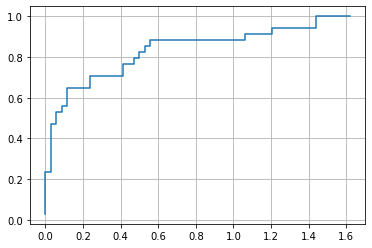

In [158]:
plt.plot(rocdf['pfa'],rocdf['power'])
plt.grid()

In [159]:
from sklearn.metrics import roc_curve, classification_report, roc_auc_score

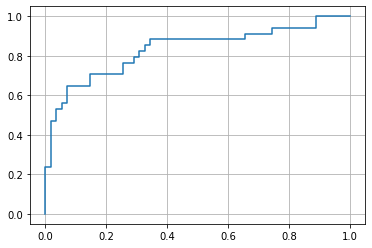

In [160]:
pfa, power, _ = roc_curve(ytest,soft)
plt.plot(pfa,power);
plt.grid()